In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import GridSearchCV
%config InlineBackend.figure_format = 'retina'

## Q1 Support Vector Machine

### Linear SVM

In [4]:
# 1) Load data.

X_and_Y = np.load('./arrhythmia.npy')    # Load data from file.
print(f'X_and_Y.shape: {X_and_Y.shape}')
np.random.shuffle(X_and_Y)    # Shuffle the data.
X = X_and_Y[:, 0:X_and_Y.shape[1] - 1]    # First column to second last column: Features (numerical values) 
Y = X_and_Y[:, X_and_Y.shape[1] - 1]    # Last column: Labels (0 or 1)
print(X.shape, Y.shape)       # Check the shapes.

X_and_Y.shape: (452, 280)
(452, 279) (452,)


In [5]:
print(Y[:5])
print(len(X))
print(round(len(X) * .8))

[ 0.  1.  1.  1.  0.]
452
362


In [6]:
# 2) Split the dataset into 2 parts: 
#    (a) Training set + Validation set  (80% of all data points)
#    (b) Test set                       (20% of all data points)
eighty_percent = round(len(X) * .8)
X_train_val = X[:eighty_percent] # Get features from train + val set.
X_test      = X[eighty_percent:] # Get features from test set.     
Y_train_val = Y[:eighty_percent] # Get labels from train + val set.
Y_test      = Y[eighty_percent:] # Get labels from test set.  
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(362, 279) (90, 279) (362,) (90,)


In [7]:
# 3) Consider linear kernel. Perform grid search for best C 
#    with 3-fold cross-validation. You can use svm.SVC() for SVM
#    classifier and use GridSearchCV() to perform such grid search.
#    For more details, please refer to the sklearn documents:
#         http://scikit-learn.org/stable/modules/svm.html
#         http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

svc = svm.SVC()
C_list     = [10 ** -6, 10 ** -5, 10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1] # Different C to try.
parameters = {'kernel':['linear'], 'C': C_list}
classifier = GridSearchCV(svc, parameters, scoring='accuracy', return_train_score=True)
classifier.fit(X_train_val, Y_train_val)


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear'], 'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [8]:
print(classifier.best_params_)
print('\n')
print(classifier.cv_results_)
print('\n')
print(classifier.cv_results_['mean_train_score'])
print('\n')
print(classifier.cv_results_['mean_test_score'])

{'C': 0.0001, 'kernel': 'linear'}


{'mean_fit_time': array([ 0.0323538 ,  0.01338943,  0.01230017,  0.02135658,  0.07261467,
        0.29271785]), 'std_fit_time': array([  2.22069654e-02,   8.39161900e-05,   6.79003119e-04,
         3.39514225e-03,   2.95841943e-02,   2.13903890e-01]), 'mean_score_time': array([ 0.00836897,  0.00595609,  0.00498883,  0.00393041,  0.00352176,
        0.00331608]), 'std_score_time': array([ 0.00114371,  0.00014438,  0.00038157,  0.00027609,  0.00039251,
        0.00034691]), 'param_C': masked_array(data = [1e-06 1e-05 0.0001 0.001 0.01 0.1],
             mask = [False False False False False False],
       fill_value = ?)
, 'param_kernel': masked_array(data = ['linear' 'linear' 'linear' 'linear' 'linear' 'linear'],
             mask = [False False False False False False],
       fill_value = ?)
, 'params': [{'C': 1e-06, 'kernel': 'linear'}, {'C': 1e-05, 'kernel': 'linear'}, {'C': 0.0001, 'kernel': 'linear'}, {'C': 0.001, 'kernel': 'linear'}, {'C': 0.01

In [21]:
demo_acc        = np.array([[0.8],
                            [0.7]])

print(demo_acc.shape)

skunk = classifier.cv_results_['mean_train_score'].reshape(-1, 1)
print(skunk.shape)
print(classifier.cv_results_['mean_train_score'].shape)

(2, 1)
(6, 1)
(6,)


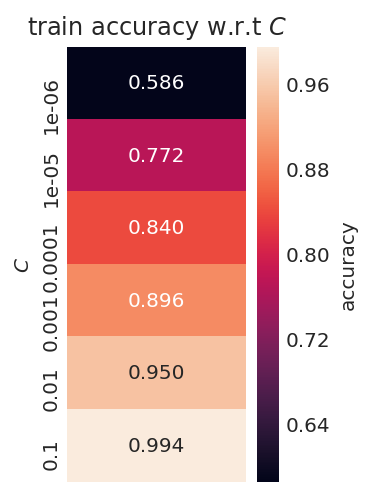

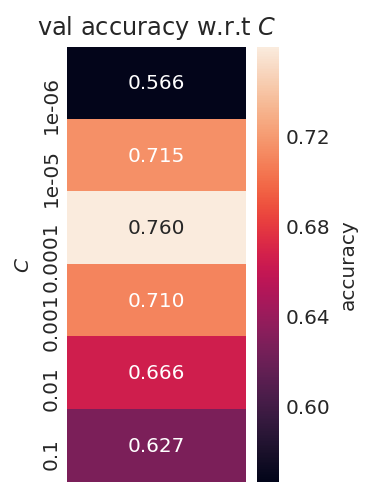

In [23]:
# 4) Draw heatmaps for result of grid search and find 
#    best C for validation set.

def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
#
# You can use the draw_heatmap_linear() to draw a heatmap to visualize 
# the accuracy w.r.t. C and gamma. Some demo code is given below as hint:
#
# demo_acc        = np.array([[0.8],
#                             [0.7]])
# demo_C_list     = [0.1, 1]
# draw_heatmap_linear(demo_acc, 'demo accuracy', demo_C_list)
#

train_acc = classifier.cv_results_['mean_train_score'].reshape(-1, 1)
draw_heatmap_linear(train_acc, 'train accuracy', C_list)

val_acc = classifier.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', C_list)

In [24]:
C_star = .0001 # based on 'val accuracy' heatmap above.

In [27]:
# 5) Use the best C to calculate the test accuracy.
from sklearn.metrics import accuracy_score
clf = svm.SVC(C = C_star)
clf.fit(X_train_val, Y_train_val)
y_pred = clf.predict(X_test)

test_acc = accuracy_score(Y_test, y_pred)
print(test_acc)

0.577777777778


### SVM with RBF Kernel

In [29]:
# 1) Consider RBF kernel. Perform grid search for best C and gamma 
#    with 3-fold cross-validation. You can use svm.SVC() for SVM
#    classifier and use GridSearchCV() to perform such grid search.
#    For more details, please refer to the sklearn documents:
#         http://scikit-learn.org/stable/modules/svm.html
#         http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

svc = svm.SVC()
C_list     = [0.1, 1, 10, 100] # Different C to try.
gamma_list = [10 ** -7 , 10 ** -6 , 10 ** -5 , 10 ** -4] # Different gamma to try.
parameters = {'kernel':['rbf'], 'C': C_list, 'gamma': gamma_list}
classifier = GridSearchCV(svc, parameters, scoring='accuracy', return_train_score=True)
classifier.fit(X_train_val, Y_train_val)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [1e-07, 1e-06, 1e-05, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [32]:
classifier.cv_results_

{'mean_fit_time': array([ 0.03184787,  0.01802357,  0.01700433,  0.01784913,  0.0169301 ,
         0.01653488,  0.01445389,  0.0179344 ,  0.01678705,  0.01412026,
         0.01434867,  0.0182271 ,  0.01473427,  0.01371741,  0.01861509,
         0.01809883]),
 'mean_score_time': array([ 0.01286689,  0.00829713,  0.00799521,  0.00853618,  0.00787536,
         0.00772508,  0.00643293,  0.00834576,  0.00784747,  0.0061748 ,
         0.00601228,  0.00826343,  0.00637754,  0.00510073,  0.00576131,
         0.00830213]),
 'mean_test_score': array([ 0.53314917,  0.53314917,  0.64917127,  0.53314917,  0.53314917,
         0.65469613,  0.74309392,  0.6961326 ,  0.64088398,  0.74033149,
         0.75690608,  0.6961326 ,  0.74033149,  0.75138122,  0.6961326 ,
         0.6961326 ]),
 'mean_train_score': array([ 0.53314968,  0.53314968,  0.66168503,  0.53314968,  0.53314968,
         0.66853765,  0.81357897,  0.98620294,  0.66990358,  0.80942378,
         0.94477732,  1.        ,  0.81078972,  0.882

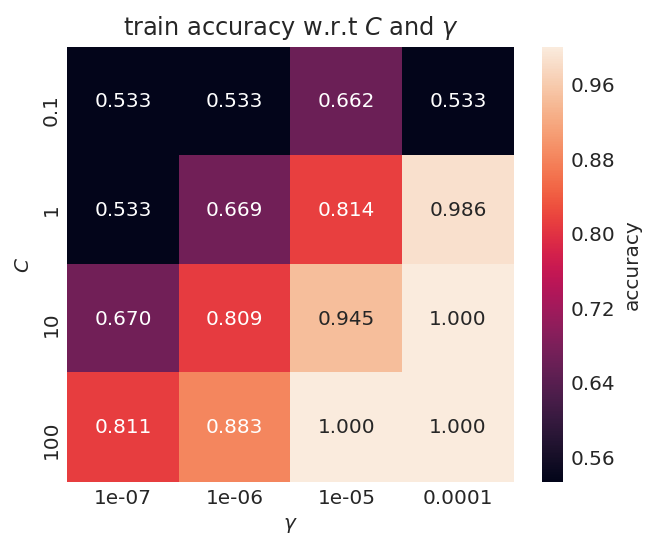

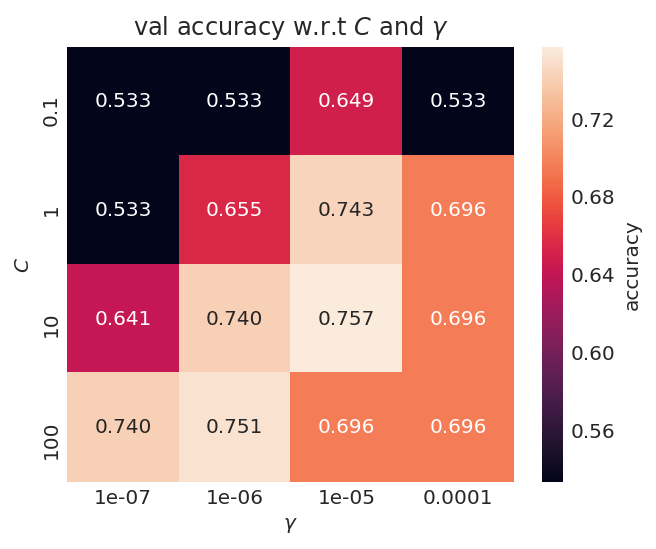

In [35]:
# 2) Draw heatmaps for result of grid search and find 
#    best C and gamma for validation set.

def draw_heatmap_RBF(acc, acc_desc, gamma_list, C_list):
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$ and $\gamma$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
#
# You can use the draw_heatmap_RBF() to draw a heatmap to visualize 
# the accuracy w.r.t. C and gamma. Some demo code is given below as hint:
#
# demo_acc        = np.array([[0.8, 0.7],
#                             [0.7, 0.9]])
# demo_C_list     = [0.1, 1]
# demo_gamma_list = [0.01, 0.1]
# draw_heatmap_RBF(demo_acc, 'demo accuracy', demo_gamma_list, demo_C_list)
#

train_acc = classifier.cv_results_['mean_train_score'].reshape(4,4)
draw_heatmap_RBF(train_acc, 'train accuracy', gamma_list, C_list)

val_acc   = classifier.cv_results_['mean_test_score'].reshape(4,4)
draw_heatmap_RBF(val_acc, 'val accuracy',gamma_list, C_list)

In [36]:
C_star = 10
gamma_star = 10 ** -5

In [37]:
# 3) Use the best C and gamma to calculate the test accuracy.

clf = svm.SVC(C = C_star, gamma = gamma_star)
clf.fit(X_train_val, Y_train_val)
y_pred = clf.predict(X_test)

test_acc = accuracy_score(Y_test, y_pred)
print(test_acc)

0.822222222222


### Re-implementation of Cross-validation and Grid Search 

In [92]:
# 1) Implement a simple cross-validation.
def simple_cross_validation(X_train_val, Y_train_val, C, gamma, fold):
    """
    A simple cross-validation function.
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C:           Parameter C for SVM.
    gamma:       Parameter gamma for SVM.
    fold:        The number of folds to do the cross-validation.
    
    Return the average accuracy on validation set.
    """
    val_acc_list = []
    train_acc_list = []
    for i in range(fold):
        __________________
        __________________
        __________________
        __________________
        __________________
        __________________
        __________________
        __________________
        __________________
        __________________
        val_acc_list.append(__________________)
        train_acc_list.append(__________________)
        
    return sum(val_acc_list) / len(val_acc_list), \
           sum(train_acc_list) / len(train_acc_list)

In [93]:
# 2) Implement the grid search function. 
def simple_GridSearchCV_fit(X_train_val, Y_train_val, C_list, gamma_list, fold):
    """
    A simple grid search function for C and gamma with cross-validation. 
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C_list:      The list of C values to try.
    gamma_list:  The list of gamma values to try.
    fold:        The number of folds to do the cross-validation.
    
    Return the val and train accuracy matrix of cross-validation. 
    All combinations of C and gamma are
    included in the matrix. Shape: (len(C_list), len(gamma_list))
    """
    val_acc_matrix   = __________________
    train_acc_matrix = __________________
    __________________
        __________________
            __________________
    return val_acc_matrix, train_acc_matrix

In [95]:
# 3) Perform grid search with 3-fold cross-validation.
#    Draw heatmaps for result of grid search and find 
#    best C and gamma for validation set.
val_acc_matrix, train_acc_matrix = \
    simple_GridSearchCV_fit(X_train_val, Y_train_val, C_list, gamma_list, 3)

draw_heatmap_RBF(val_acc_matrix, 'val accuracy', gamma_list, C_list)
draw_heatmap_RBF(train_acc_matrix, 'train accuracy', gamma_list, C_list)